<a href="https://colab.research.google.com/github/wissemkarous/Academic-projects/blob/main/TP_filtrage_traitementImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TP : Traitement et Codage Image <br>
           

```
 Filtrage d’images
```



```
Réalisé par : Wissem Karous
```


```
classe : 2GT2
```







### Partie I : filtrage passe-bas :

**1.Bruitage d’une image**

Question 1 :

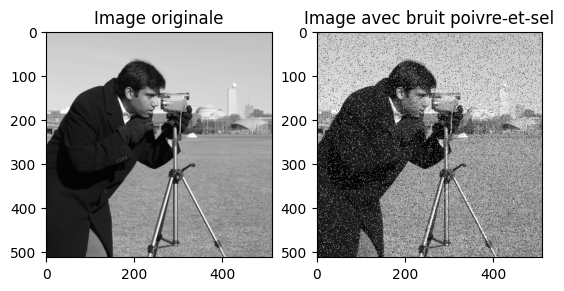

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, io

# Chargement de  l'image du cameraman
image_cameraman = data.camera()

# Ajouter du bruit de type « poivre-et-sel » à l'image
image_noisy = util.random_noise(image_cameraman, mode='s&p', amount=0.1)

# Affichage de  l'image d'origine
plt.subplot(1, 2, 1)
plt.imshow(image_cameraman, cmap='gray')
plt.title('Image originale')

# Afficher l'image avec du bruit
plt.subplot(1, 2, 2)
plt.imshow(image_noisy, cmap='gray')
plt.title('Image avec bruit poivre-et-sel')

# Affichage de les deux images
plt.show()


`Constatation de la question 1 :`





Après l'application du bruit de type « poivre-et-sel » à l'image du cameraman, nous observons une altération notable de l'image d'origine. Le bruit introduit se manifeste sous la forme de pixels très clairs (sel) et très sombres (poivre), répartis de manière aléatoire sur l'image. Cette distorsion visuelle peut affecter la qualité perçue de l'image et rendre certaines régions moins discernables.


---




**Question 2 :**

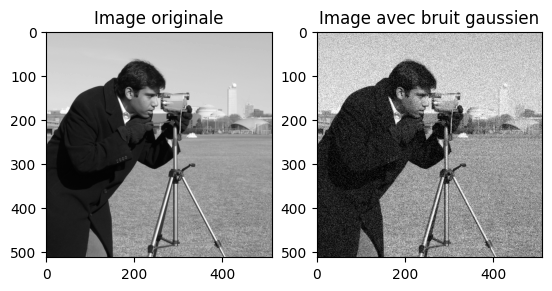

In [ ]:
# Ajout du bruit gaussien à l'image méme image que question 1
image_noisy = util.random_noise(image_cameraman, mode='gaussian', var=0.01)

# Affichage  d'image d'origine
plt.subplot(1, 2, 1)
plt.imshow(image_cameraman, cmap='gray')
plt.title('Image originale')

# Affichage  d'image avec du bruit gaussien
plt.subplot(1, 2, 2)
plt.imshow(image_noisy, cmap='gray')
plt.title('Image avec bruit gaussien')

# Affichage  de deux images
plt.show()


`Constatation de la question 2 :`

Suite à l'application du bruit de type « gaussien » à l'image du cameraman, nous constatons une altération différente par rapport au bruit « poivre-et-sel ». Le bruit gaussien se manifeste sous la forme d'une perturbation plus douce et continue de l'image, créant une sorte de flou global. Contrairement au bruit « poivre-et-sel », le bruit gaussien n'introduit pas de pixels extrêmement clairs ou sombres, mais plutôt une variation plus subtile des niveaux de gris.

---



**Question 3 :**

In [ ]:
# Deja fait de plus la constatation explique comment peut-on créer ce bruit

**2.Filtrage moyenneur :**

`a. Principe :`
Le filtre moyenneur est un filtre passe-bas. En l'appliquant sur l'image, celle-ci devient floue
et plus particulièrement les contours. Ce filtre sert à éliminer les dégradations locales de faibles
dimensions. Son principe est de remplacer chaque pixel par la moyenne des valeurs des pixels
adjacentes et du pixel central. Il pourrait y avoir plusieurs tailles de masque 3×3, 5×5 et 7×7 qui
définissent des filtres moyenneurs différents.

`b. Questions:`

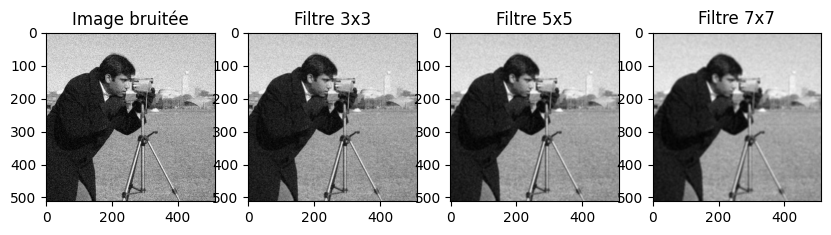

In [ ]:
from scipy.ndimage import convolve

# Chargement de l'image du cameraman bruitée
image_cameraman_noisy = util.random_noise(data.camera(), mode='gaussian', var=0.01)

# Définition de  les noyaux de dimension 3x3, 5x5 et 7x7 pour le filtrage moyenneur
kernel_3x3 = np.ones((3, 3)) / 9
kernel_5x5 = np.ones((5, 5)) / 25
kernel_7x7 = np.ones((7, 7)) / 49

# Application le filtrage moyenneur avec chaque noyau
image_filtered_3x3 = convolve(image_cameraman_noisy, kernel_3x3)
image_filtered_5x5 = convolve(image_cameraman_noisy, kernel_5x5)
image_filtered_7x7 = convolve(image_cameraman_noisy, kernel_7x7)

# Affichage de résultats
plt.figure(figsize=(10, 4))

plt.subplot(1, 4, 1)
plt.imshow(image_cameraman_noisy, cmap='gray')
plt.title('Image bruitée')

plt.subplot(1, 4, 2)
plt.imshow(image_filtered_3x3, cmap='gray')
plt.title('Filtre 3x3')

plt.subplot(1, 4, 3)
plt.imshow(image_filtered_5x5, cmap='gray')
plt.title('Filtre 5x5')

plt.subplot(1, 4, 4)
plt.imshow(image_filtered_7x7, cmap='gray')
plt.title('Filtre 7x7')

plt.show()

`Constatation :`

Suite à l'application du filtrage moyenneur avec des noyaux de dimensions 3x3, 5x5 et 7x7 sur l'image du cameraman bruitée, nous observons des variations dans les résultats qui dépendent de la taille du noyau utilisé.
> Filtre 3x3 : L'image filtrée avec un noyau 3x3 montre une atténuation du bruit, mais certains détails fins peuvent ne pas être préservés aussi efficacement. Le lissage est perceptible, mais il reste relativement subtil.




> Filtre 5x5 : Avec un noyau de dimension 5x5, le lissage est plus prononcé. Le bruit est davantage réduit, mais il peut y avoir une légère perte de netteté dans les contours et les détails de l'image.

> Filtre 7x7 : Le filtre 7x7 accentue le lissage et la réduction du bruit, mais cela s'accompagne d'une plus grande perte de détails fins. Les contours des objets peuvent apparaître plus flous.

En général, l'utilisation de noyaux de plus grande dimension dans le filtrage moyenneur conduit à un lissage plus fort de l'image au détriment de la préservation des détails. Le choix de la taille du noyau dépend des compromis entre la réduction du bruit souhaitée et la préservation des caractéristiques importantes de l'image. Dans le cas présent, il est crucial de trouver un équilibre afin d'obtenir une image filtrée qui satisfait les exigences spécifiques de la tâche de traitement d'image.

**3. Filtrage médian :**

`a. Principe:`
Le filtre médian est un filtre non linéaire. Il permet d'atténuer certains types de bruits en
dégradant très peu les contours. Il est efficace pour éliminer les bruits qui affectent
seulement un petit nombre de pixels. Son principe est d'affecter à un pixel la valeur
médiane des intensités dans son voisinage.

`b. Questions:  `

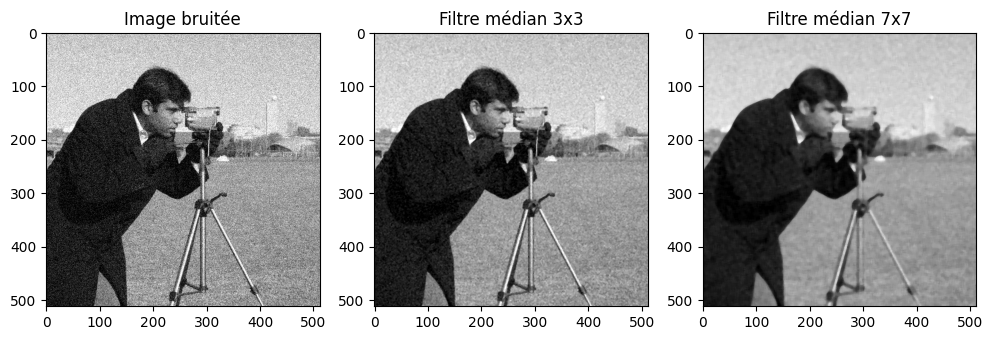

In [ ]:
from scipy.ndimage import median_filter

# Chargement d'image du cameraman bruitée
image_cameraman_noisy = util.random_noise(data.camera(), mode='gaussian', var=0.01)

# Application de  le filtre médian de 3x3
image_median_3x3 = median_filter(image_cameraman_noisy, size=3)

# Application de  le filtre médian de 7x7
image_median_7x7 = median_filter(image_cameraman_noisy, size=7)

# Affichage de  résultats
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_cameraman_noisy, cmap='gray')
plt.title('Image bruitée')

plt.subplot(1, 3, 2)
plt.imshow(image_median_3x3, cmap='gray')
plt.title('Filtre médian 3x3')

plt.subplot(1, 3, 3)
plt.imshow(image_median_7x7, cmap='gray')
plt.title('Filtre médian 7x7')

plt.show()

En comparant les résultats, vous pourrez observer l'effet du filtre médian par rapport au filtre moyenneur :

---



Le filtre médian est efficace pour réduire le bruit tout en préservant les contours et les détails fins de l'image. Cela se manifeste par une nette amélioration de la clarté des objets.

Comparativement au filtre moyenneur, le filtre médian est plus performant pour éliminer le bruit impulsionnel, comme le bruit « poivre-et-sel », tout en évitant le lissage excessif des contours.

En résumé, le filtre médian est particulièrement utile pour supprimer les types de bruit impulsionnel tout en préservant les caractéristiques importantes de l'image. En comparaison avec le filtre moyenneur, le filtre médian est souvent préféré dans des scénarios où la préservation des détails est cruciale.

##### 4.Filtrage gaussian :

`a. Principe:`
Le filtre gaussien est un filtre passe-bas dont la réponse impulsionnelle est une fonction
gaussienne. Mathématiquement, ce filtre modifie le signal entrant par une convolution avec
une fonction gaussienne. Comme pour le filtre moyenneur, nous distinguons entre le filtre
gaussien 3 x 3 et le filtre gaussien 5 x 5...

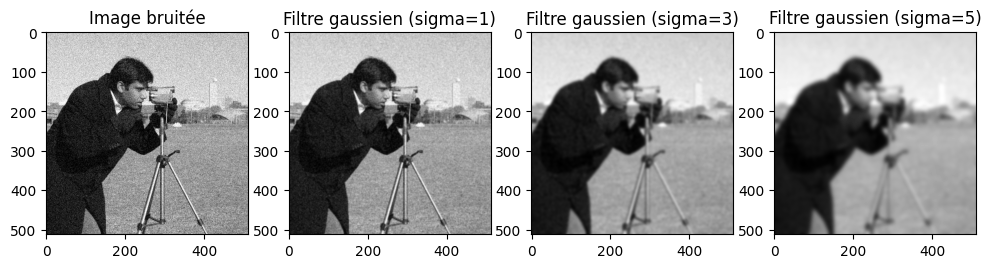

In [ ]:

from skimage import  filters

# Chargement de l'image du cameraman bruitée
image_cameraman_noisy = util.random_noise(data.camera(), mode='gaussian', var=0.01)

# Application le filtre gaussien avec sigma = 1
image_gaussian_1 = filters.gaussian(image_cameraman_noisy, sigma=1)

# Application le filtre gaussien avec sigma = 3
image_gaussian_3 = filters.gaussian(image_cameraman_noisy, sigma=3)

# Application le filtre gaussien avec sigma  = 5
image_gaussian_5 = filters.gaussian(image_cameraman_noisy, sigma=5)

# Affichage les résultats
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image_cameraman_noisy, cmap='gray')
plt.title('Image bruitée')

plt.subplot(1, 4, 2)
plt.imshow(image_gaussian_1, cmap='gray')
plt.title('Filtre gaussien (sigma=1)')

plt.subplot(1, 4, 3)
plt.imshow(image_gaussian_3, cmap='gray')
plt.title('Filtre gaussien (sigma=3)')

plt.subplot(1, 4, 4)
plt.imshow(image_gaussian_5, cmap='gray')
plt.title('Filtre gaussien (sigma=5)')

plt.show()


`En interprétant les résultats :`

Avec un sigma plus petit (par exemple, 1), le filtre gaussien atténue le bruit tout en préservant davantage de détails fins. Cependant, le lissage est moins prononcé.

Avec un sigma plus grand (par exemple, 5), le lissage est plus important, conduisant à une réduction plus significative du bruit, mais avec une perte plus notable de détails fins.

En ajustant la valeur de sigma, vous pouvez contrôler le compromis entre la réduction du bruit et la préservation des détails dans l'image filtrée. Un choix judicieux de sigma dépendra des caractéristiques spécifiques de l'image et des exigences de la tâche.

## Partie II : Filtrage passe-haut

`a. Principe:`
Un filtre passe-haut réalise l'opération complémentaire de celle obtenue avec les filtres
passe-bas.
Il permet alors d'atténuer les basses fréquences et faire passer les hautes fréquences. Son
utilisation principale est la détection de contours.

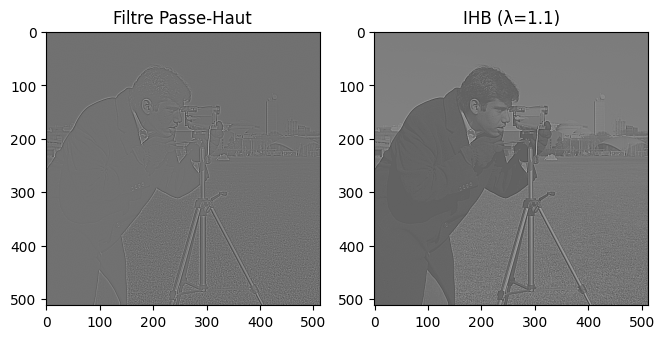

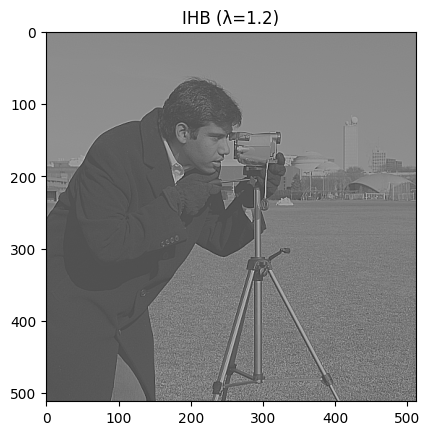

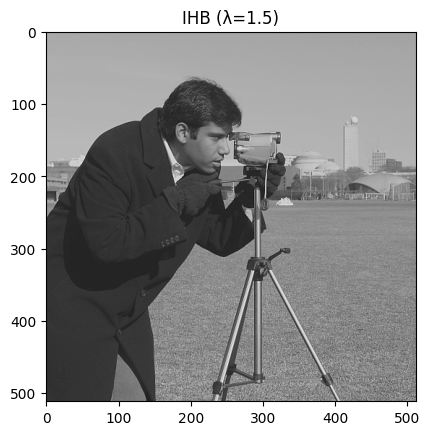

In [ ]:
from scipy.signal import convolve2d
# Définir le noyau du filtre passe-haut
kernel_passe_haut = np.array([[-1, -1, -1],
                              [-1,  8, -1],
                              [-1, -1, -1]]) / 9

# Définir le noyau du filtre passe-bas (moyenne 3x3)
kernel_passe_bas = np.ones((3, 3)) / 9

# Application de  filtre passe-haut
image_filtre_passe_haut = convolve2d(image_cameraman, kernel_passe_haut, mode='same', boundary='symm')

#  Application de  filtre (moyenne 3x3)
image_filtre_passe_bas = convolve2d(image_cameraman, kernel_passe_bas, mode='same', boundary='symm')

# Comparer les images passe-haut et passe-bas
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_filtre_passe_haut, cmap='gray')
plt.title('Filtre Passe-Haut')

plt.subplot(1, 3, 2)
plt.imshow(image_filtre_passe_bas, cmap='gray')
plt.title('Filtre Passe-Bas (Moyenne 3x3)')

# Calculer et comparer IPH avec IHB pour différentes valeurs de lambda
lambda_values = [1.1, 1.2, 1.5]

for lambda_val in lambda_values:
    # Calculer IHB
    image_ihb = (lambda_val - 1) * image_filtre_passe_bas + image_filtre_passe_haut

    # Afficher le résultat
    plt.imshow(image_ihb, cmap='gray')
    plt.title(f'IHB (λ={lambda_val})')
    plt.show()

**Constatation :**

Suite à l'application des filtres passe-haut et passe-bas, ainsi qu'à la création de l'image combinée (IHB) avec différentes valeurs de lambda, plusieurs observations peuvent être faites.

`Filtre Passe-Haut :` L'image résultante du filtre passe-haut met en évidence les contours et les détails saillants de l'image du cameraman. Ce filtre amplifie les variations d'intensité, soulignant les transitions brusques entre les pixels.

`Filtre Passe-Bas (Moyenne 3x3) :` Le filtre passe-bas avec noyau de moyenne 3x3 produit une image lissée où les détails fins sont atténués. Les variations d'intensité sont moyennées sur un voisinage, conduisant à une perte de certains détails, mais également à la réduction du bruit.

`Image Combinée (IHB) : `En combinant l'image filtrée par le passe-bas et celle par le passe-haut avec différentes valeurs de lambda, nous observons une transition entre les caractéristiques des deux filtres. Une valeur de lambda plus faible favorise les caractéristiques du filtre passe-haut, tandis qu'une valeur plus élevée favorise le passe-bas. Cela permet un contrôle continu entre l'accentuation des détails fins et le lissage global de l'image.

`En résumé` :l'utilisation de différents filtres et la combinaison avec des poids variables (lambda) offrent une flexibilité dans le traitement d'image, permettant de réguler la manière dont les caractéristiques spatiales sont préservées ou atténuées. Le choix approprié dépend des exigences spécifiques de la tâche de traitement d'image.

`c. Filtres passe-haut prédéfinis`


**Partie 1 : Utilisation des filtres Sobel et Prewitt pour la détection de contours**

J'ai choisi l'image du boxplot puisque elle contient plusieurs détails.








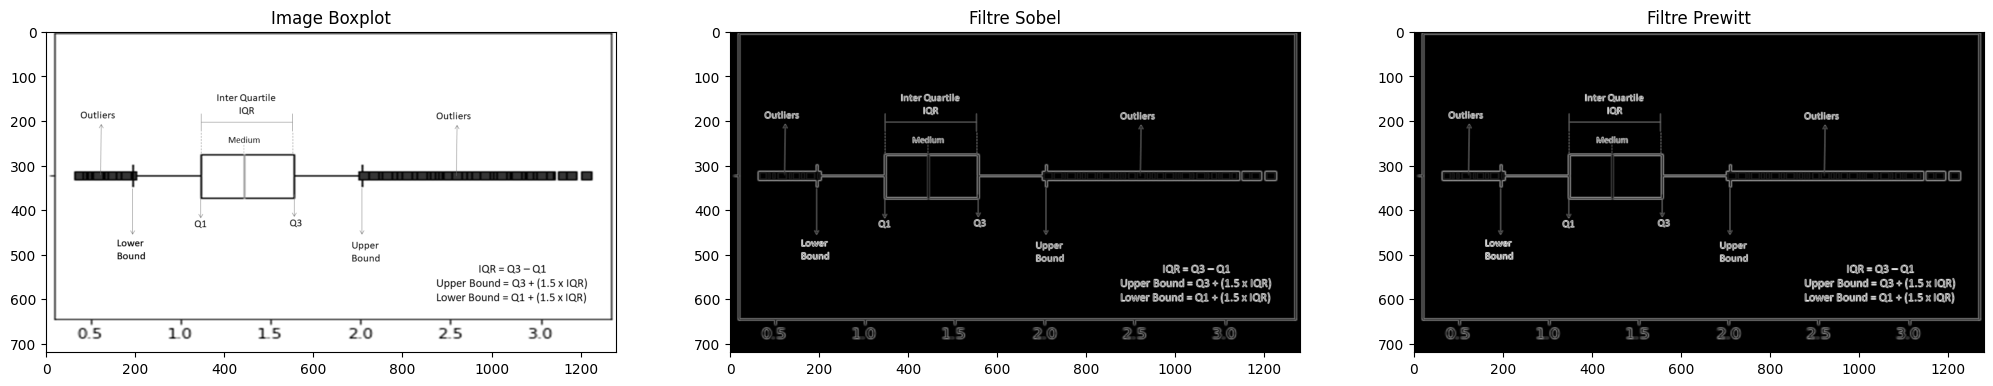

In [ ]:

from skimage import io, color, filters

# Chargement l'image L.png
image_L = io.imread('/content/IQR.png', as_gray=True)

# Application de  filtres Sobel et Prewitt
image_sobel = filters.sobel(image_L)
image_prewitt = filters.prewitt(image_L)

# Affichage de résultats
plt.figure(figsize=(25, 12))

plt.subplot(1, 3, 1)
plt.imshow(image_L, cmap='gray')
plt.title('Image Boxplot')

plt.subplot(1, 3, 2)
plt.imshow(image_sobel, cmap='gray')
plt.title('Filtre Sobel')

plt.subplot(1, 3, 3)
plt.imshow(image_prewitt, cmap='gray')
plt.title('Filtre Prewitt')

plt.show()


**Partie 2 : Seuillage et variation du seuil**

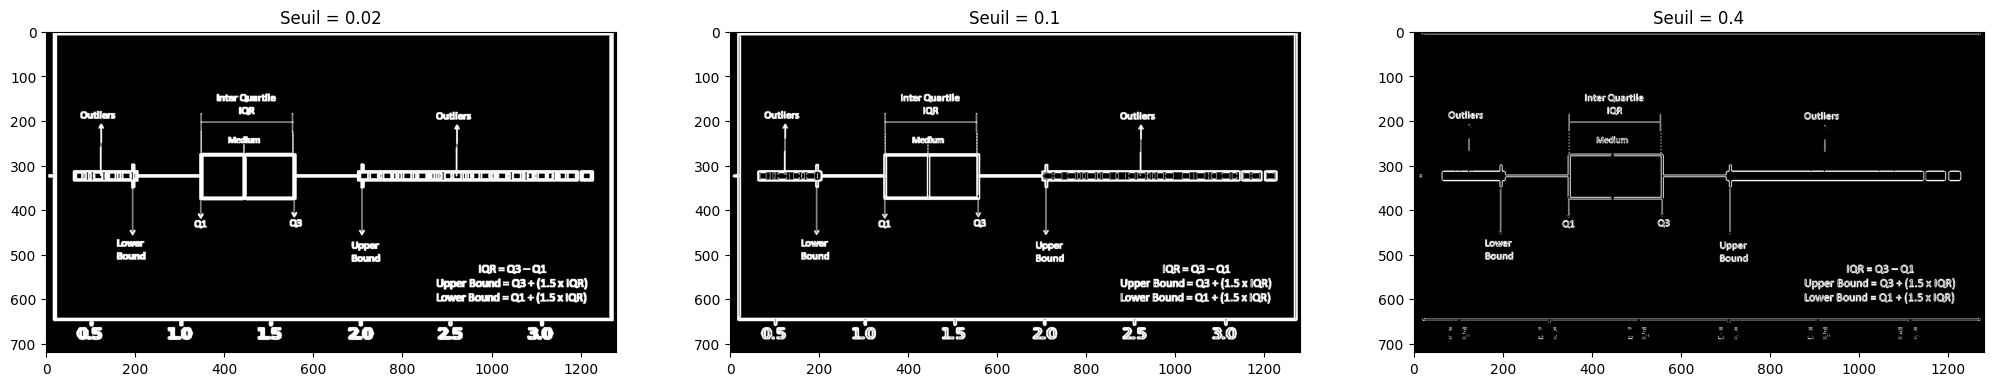

In [ ]:
# Test de  différents seuils
seuils = [0.02, 0.1, 0.4]

plt.figure(figsize=(25, 12))

for i, seuil in enumerate(seuils, start=1):
    # Applicqtion  le seuillage
    contours_seuilles = image_sobel > seuil * image_sobel.max()

    # Affichage  les résultats
    plt.subplot(1, len(seuils), i)
    plt.imshow(contours_seuilles, cmap='gray')
    plt.title(f'Seuil = {seuil}')

plt.show()


**Partie 3 : Trouver le seuil optimal :**

Trouver le seuil optimal peut être un processus itératif. Dans notre cas c'est seuil=0.02

**Partie 4 : Filtre Canny**

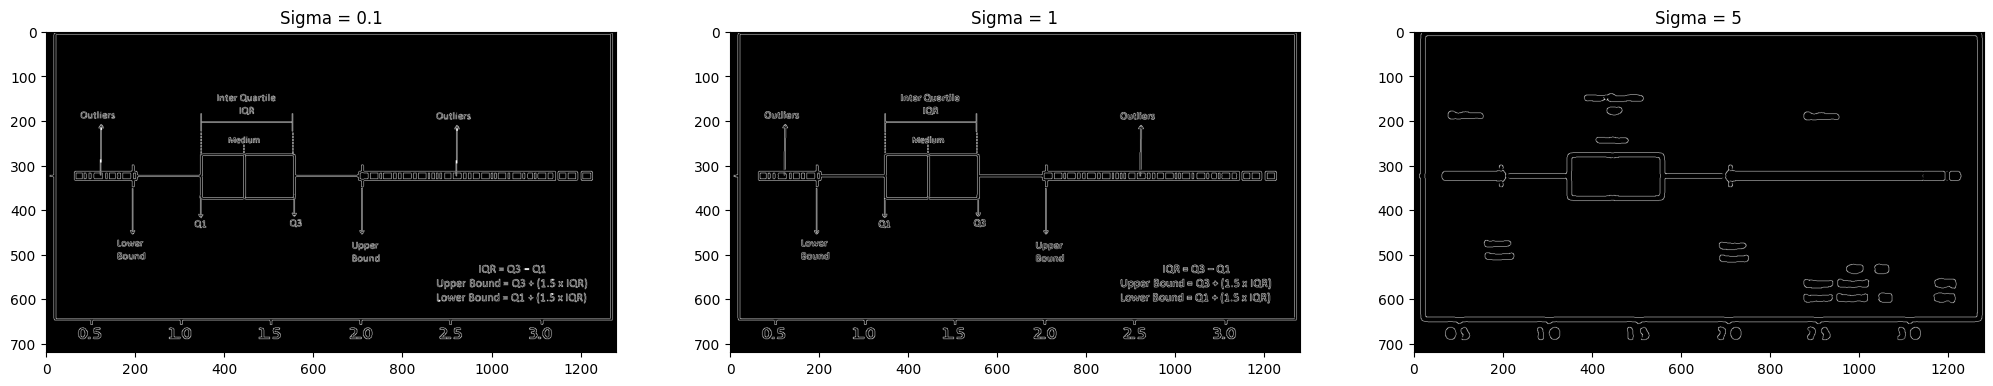

In [ ]:
from skimage.feature import canny

# Test le filtre Canny avec différentes valeurs de sigma
sigmas = [0.1, 1, 5]

plt.figure(figsize=(25, 12))

for i, sigma in enumerate(sigmas, start=1):
    # Application de  filtre Canny
    image_canny = canny(image_L, sigma=sigma)

    # Affichage de  résultats
    plt.subplot(1, len(sigmas), i)
    plt.imshow(image_canny, cmap='gray')
    plt.title(f'Sigma = {sigma}')

plt.show()


**Partie 5 : Comparaison avec les résultats précédents** <br>
La comparaison peut se faire en évaluant visuellement la qualité des contours détectés
dans notre cas le filtre Canny est plus efficace .

                                                                        Merci de votre attention
                                                                        
 ---